<b>Nota</b>: este Notebook está basado en una práctica desarrollada en un curso de DSP por la 
École Polytechnique Fédérale de Lausanne ‐ EPFL


# Transmisión digital vs analógica


En este Notebook exploraremos las ventajas de la transmisión digital sobre la transmisión analógica, tal y como vimos en el tema de Introducción. Consideraremos un escenario en el que necesitamos transmitir datos a larga distancia (ej. a través de un cable transoceánico) por lo que es necesario tener diferentes repetidores. 



Recuerda que al mandar la señal por cada segmento de cable (canal) se introducirá una atenuación de $ 1 / G $ y un ruido  aditivo. Podemos compensar la atenuación con un repetidor con ganancia $ G $ pero el ruido también se amplificará de modo que, después de $ N $ repetidores, el ruido se habrá amplificado $ N $ veces:

$$
    \hat{x}_N(t)  = x(t) + NG\sigma(t)
$$

![Esquema transmision analógica](./transmision_analogica.png)




Al emplear señales digitales podremos añadir funciones de umbralización después de cada repetidor para eliminar el ruido en cada etapa por "software". Empleando este esquema la señal llegaría a destino sin ruido.

$$
    \hat{x}(t)  = sgn[x(t) + G\sigma(t)]
$$


![Esquema transmision digital](./transmision_digital.png)

In [1]:
#librerias necesarias para la práctica
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

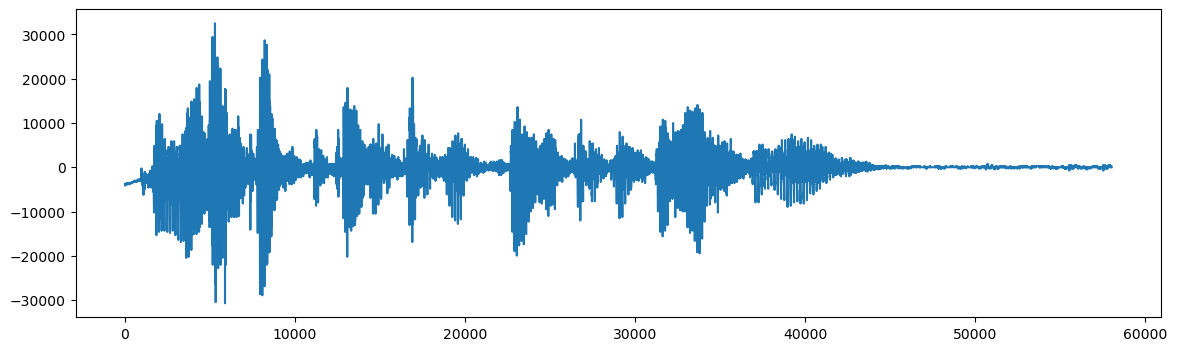

In [2]:
#Cargamos un mensaje de voz
rate, s = wavfile.read('mensaje.wav') #Return the sample rate (in samples/sec) and data from an LPCM WAV file
plt.plot(s)
IPython.display.Audio(s, rate=rate)


## La señal analógica y la señal digital ##

Crearemos una versión digital y otra analógica de la señal para nuestro experimento. Obviamente la señal analógica no será auténtica, ya que estamos en un dispositivo digital, será una simulación muy sencilla asumiendo que empleando valores en punto flotante tenemos precisión infinita. En la versión digital tendremos una señal discretizada con valores entre -100 y 100 (aprox. 8 bits por muestra)



[-11.81102362 -11.81102362 -12.5984252  -12.5984252  -11.81102362
 -11.81102362 -11.81102362 -12.5984252  -12.5984252  -11.81102362
 -12.5984252  -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -12.5984252  -11.81102362 -12.5984252  -12.5984252  -12.5984252
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362]


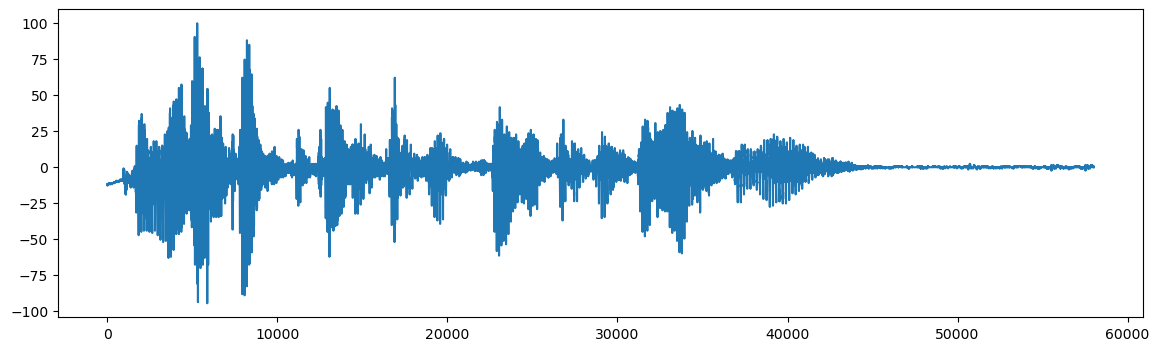

[-12. -12. -13. -13. -12. -12. -12. -13. -13. -12. -13. -12. -12. -12.
 -12. -13. -12. -13. -13. -13. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12.]


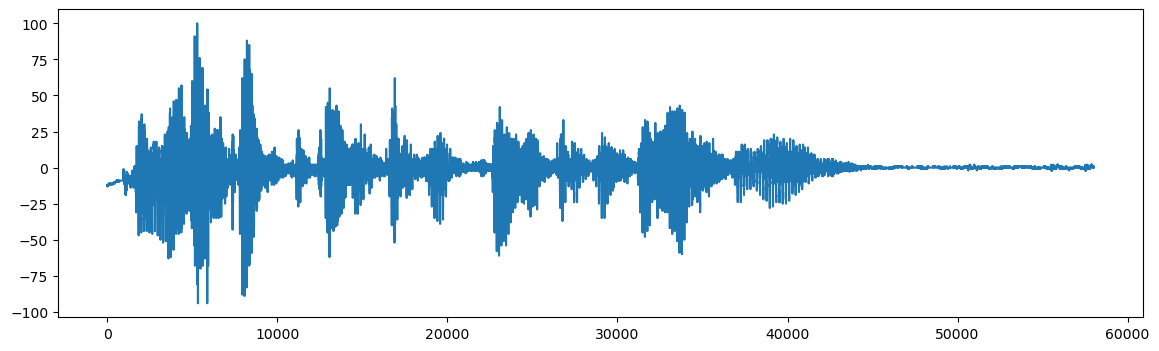

In [3]:
# Rescalado simple de la señal, entre -100 y 100 con valores 'analógicos'
norm = 1.0 / max(np.absolute([min(s), max(s)]))
analogica = 100.0 * s * norm
print(analogica[:50])
plt.plot(analogica)
plt.show()
#discretización de los valores para la señal digital
digital = np.round(analogica)
print(digital[:50])
plt.plot(digital)
plt.show()


### Discretización de valores
La discretización de valores lleva asociada una pérdida de calidad que es el precio que tenemos que pagar por transmitir las señales digitales. Podemos minimizar la pérdida de calidad empleando más bits por muestra.


Si ploteamos la diferencia entre ambas señales veremos que está entre -0.5 y 0.5. Esto es por el redondeo del número real al entero.

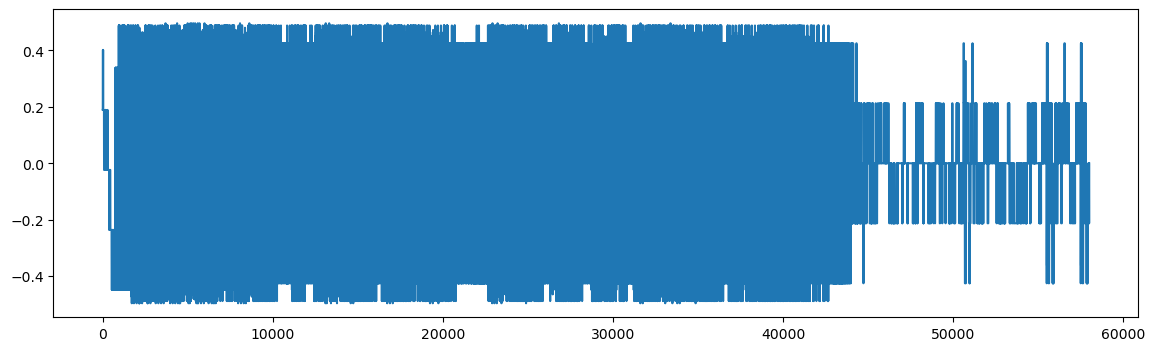

In [4]:
plt.plot(analogica-digital)

### Signal Noise Rate
La relación señal/ruido (<b>SNR</b>) se define como la proporción existente entre la potencia de la señal que se transmite y la potencia del ruido que la corrompe. Este valor suele expresarse en forma logarítmica, normalmente en decibelios. Menor SNR, menor calidad

In [5]:

def SNR(final, original):
    # potencia del error
    ruido = np.linalg.norm(original-final)
    # potencia de la señal
    sig = np.linalg.norm(original)
    # SNR en decibelios
    return 10 * np.log10(sig/ruido)


print("SNR:  {0} dB".format(SNR(digital, analogica)))


SNR:  16.154381619783678 dB


¿Puedes notar la diferencia entre la señal "analógica" y la "digital"?

In [6]:
IPython.display.Audio(analogica, rate=rate)

In [7]:
IPython.display.Audio(digital, rate=rate)

## Transmisión de la señal 

Necesitamos definir una función que represente el efecto de transmitir la señal por un segmento del cable en el que se produzcan los siguientes efectos
* La señal es atenuada
* La señal acumula ruido
* La señal es amplificada por un repetidor para compensar la atenuación



In [6]:
#Transmision analogica

def transmission(signal, amplitud_ruido, factor_atenuacion):
    nsignal=signal.copy()
    # escribir el código
    # Atenuamos la señal
    # Creamos el ruido. Se puede usar la función np.random.uniform
    # Añadimos el ruido
    # Compensamos la atenuación 
    # Devolvemos la señal
    ruido=np.random.uniform(-amplitud_ruido,len(nsignal))

    #Cogemos la señal y la multiplicamos con el factor de atenuacion
    nsignal*=factor_atenuacion
    #Le añadimos ruido a la función 
    nsignal+=ruido

    #Devuelve una simulacion de lo que sucede cuando se produce la transmisión de señal 
    return nsignal

### Transmisión de la señal  digital
Para la señal digital necesitamos una función que genere una umbralización. En este caso tan sencillo podemos simplemente volver a repetir el proceso de "digitalización" que empleamos anteriormente


In [7]:

#Pasamos la señal analogica a digital 

def signal_threshold(signal):
    tsignal=signal.copy()
    ##escribir el código para la umbralización
    #Redonde los valores
    tsignal*=np.round(tsignal)
    #Devuelve mi señal pasada a digital 
    return tsignal

### Transmision de las señales analógicas y digitales
Ahora tenemos que transmitir las señales y ver la diferencia
Tenemos que definir:
* El número de segmentos que va a cruzar en nuestra comunicación transoceánica
* Un valor de amplitud para el ruido (poned un valor pequeño menor que 0.3)
* Un valor de atenuacion

Posibles valores iniciales

- SEGMENTOS = 70
- AMPLITUD_RUIDO = 0.2
- ATENUACION = 0.5


In [8]:
#definiciones necesarias para las funciones

#las señales resultantes las almacenaremos en y_analogica e y_digital
SEGMENTOS = 70
AMPLITUD_RUIDO = 0.2
ATENUACION = 0.5
y_digital=y_analogica=None

In [10]:
#En esta celda crearemos la transmision analogica
#
#
#
def full_transmission(signal, segmentos, amplitud_ruido, atenuacion, digital=False):
    y_signal=signal.copy()
    for i in range(1,segmentos+1):
        y_signal=transmission(y_signal, amplitud_ruido, atenuacion)
        y_signal=signal_threshold(y_signal) if digital else y_signal
    return y_signal


#y_analogica= analogica.copy() if y_analogica is None else y_analogica# solo tiene sentido mientras no poneis vuestro código


y_analogica=full_transmission(analogica, SEGMENTOS, AMPLITUD_RUIDO, ATENUACION)

print ('Transmision analógica: SNR = %f dB' % SNR(y_analogica, analogica))    






NameError: name 'analogica' is not defined

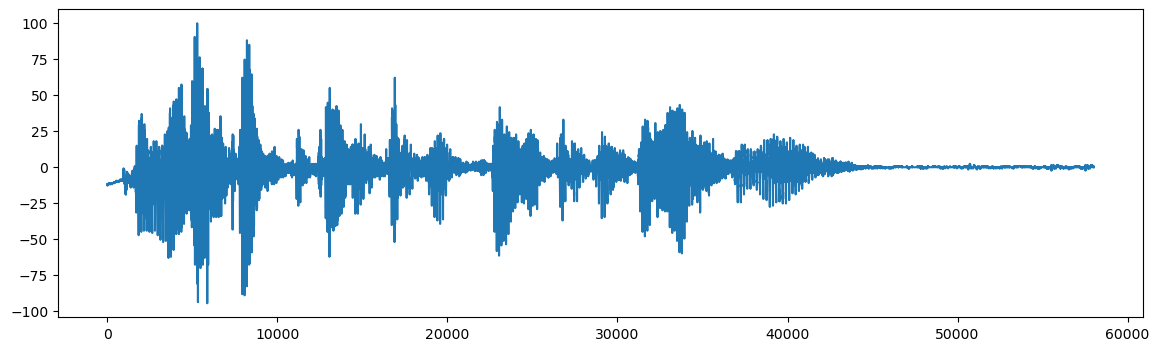

In [11]:
#Prueba de la señal analógica
plt.plot(y_analogica)
IPython.display.Audio(y_analogica, rate=rate)

In [12]:
#En esta celda crearemos la transmision digital
#
#
#
y_digital= digital.copy() if y_digital is None else y_digital # solo tiene sentido mientras no poneis vuestro código
print ('Transmision digital: SNR = %f dB' % SNR(y_digital, analogica)) 

Transmision digital: SNR = 16.154382 dB


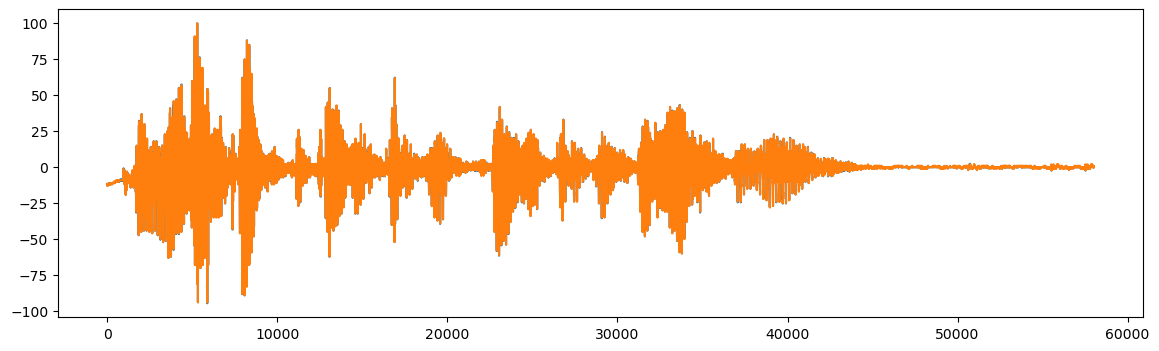

In [13]:
#Prueba de la señal digital
plt.plot(y_analogica)
plt.plot(y_digital)
plt.show()
IPython.display.Audio(y_digital, rate=rate)

#### Ejercicio 1
Dejando los valores de amplitud de ruido y de atenuación constantes, vamos a modificar los segmentos por los que se transmite probando de 1 a 150 y graficamos el SNR de la señal analógica y el de la digital para ver el efecto

In [ ]:
#Analógica
#La funcion SNR crea ruido y llamamos a nuestra función que transmite la señal 
#Como nos especifica un rango tenemos que ponerlo 
#Esta función coge una señal analogica y la transmite

señal=[SNR (transmission(analogica,AMPLITUD_RUIDO,ATENUACION),analogica)]

: 

In [27]:
#Digital
señal_digital=[SNR (transmission(digital,AMPLITUD_RUIDO,ATENUACION),digital)for i in range(1,151)]

#### Ejercicio 2

Dejando los valores de amplitud de ruido y de segmentos constantes (los iniciales) vamos a probar a introducir diferentes niveles de atenuación (entre 0 y 1) y ver el efecto en el SNR en las dos señales


In [41]:
#Analógica
#Nos pide cambiar la atenuacion teniendo una atenuación 0 hasta uno 
#plt.plot(0.1)
#plt.xlabel("Atenuacion")
#plt.ylabel("SNR - dB")
señal_digital=[SNR (transmission(digital,AMPLITUD_RUIDO,ATENUACION),digital)for i in range(1,0,-0.1)]
plt.plot(np.arange(1,0,-0.1),señal_digital)
plt.xlabel("Atenuacion")
plt.ylabel("SNR - dB")

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
#Digital

#### Ejercicio 3

Dejando el resto de los valores constantes vamos a modificar la amplitud del ruido con valores entre 0 y 1 y ver su efecto a través del SNR en las señales. 

In [ ]:
#Analógica

In [ ]:
#Digital